# PP3: Pandas

## Section 1: Getting and knowing your data

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [2]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|', index_col='user_id')

### Step 4. See the first 25 entries

In [3]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. See the last 10 entries

In [4]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?

In [5]:
number_obs = users.shape[0]
print(number_obs == len(users))
print(users.iloc[-1].name)
print(users.index[-1])
number_obs

True
943
943


943

### Step 7. What is the number of columns in the dataset?

In [6]:
number_cols = users.shape[1]
print(number_cols == len(users.columns))
number_cols

True


4

### Step 8. Print the name of all the columns.

In [7]:
print(users.columns)
print("|".join(users.columns))

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')
age|gender|occupation|zip_code


### Step 9. How is the dataset indexed?

In [8]:
print(type(users.index))
print(users.index.is_unique)
print(users.index.is_monotonic_increasing)
users.index

<class 'pandas.core.indexes.base.Index'>
True
True


Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
      dtype='int64', name='user_id', length=943)

### Step 10. What is the data type of each column?

In [9]:
print(users.info())
users.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 69.1+ KB
None


age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### Step 11. Print only the occupation column

In [10]:
#users["occupation"]
#users.iloc[:, 2]
users.loc[:,"occupation"]

user_id
1         technician
2              other
3             writer
4         technician
5              other
           ...      
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, Length: 943, dtype: object

### Step 12. How many different occupations are in this dataset?

In [11]:
#len(users.groupby('occupation').size())
#len(users.groupby('occupation').count())
#len(users['occupation'].value_counts())
#len(users['occupation'].unique())
print(len(set(users["occupation"])))
users['occupation'].nunique()

21


21

### Step 13. What is the most frequent occupation?

In [12]:
#users['occupation'].value_counts().sort_values(ascending=False).index[0]
#users['occupation'].value_counts().sort_values(ascending=False).idxmax()
users.groupby('occupation').size().sort_values(ascending=False).index[0]

'student'

### Step 14. Summarize the DataFrame.

In [13]:
users.info()
#print(users.describe())
users.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 69.1+ KB


,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


### Step 15. Summarize all the columns

In [14]:
for column in users.columns:
    print(f"Summary for {column}:")
    if users[column].dtype == 'object':
        print(users[column].value_counts())
    else:
        print(users[column].describe())
    print("\n")

Summary for age:
count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64


Summary for gender:
gender
M    670
F    273
Name: count, dtype: int64


Summary for occupation:
occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64


Summary for zip_code:
zip_code
55414    9
55105    6
55337    5
10003    5
20009    5
        ..
24060    1
55413    1
19149    1
02176    1
77841    1
Name: count, Length: 795, dtype: int64




### Step 16. Summarize only the occupation column

In [15]:
print(f"{users['occupation'].describe()} \n")
print(users['occupation'].value_counts())

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object 

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64


### Step 17. What is the mean age of users?

In [16]:
users.age.mean()

34.05196182396607

### Step 18. What is the age with least occurrence?

In [17]:
least_occurence = users.age.value_counts().min()
print(least_occurence)
users.age.value_counts()[users.age.value_counts() == least_occurence]

1


age
7     1
66    1
11    1
10    1
73    1
Name: count, dtype: int64

## Section 2: Filtering and Sorting

### Step 1. Import the necessary libraries

In [18]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv). 

### Step 3. Assign it to a variable called euro12.

In [19]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
print(euro12.info())
euro12.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


### Step 4. Select only the Goal column.

In [20]:
euro12["Goals"]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many team participated in the Euro2012?

In [21]:
print(len(set(euro12['Team'])))
len(euro12["Team"].unique())

16


16

### Step 6. What is the number of columns in the dataset?

In [22]:
len(euro12.columns)

35

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [23]:
discipline = euro12.loc[:, ["Team", "Yellow Cards", "Red Cards"]]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [24]:
discipline.sort_values(by=["Red Cards", "Yellow Cards"])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [25]:
euro12["Yellow Cards"].mean()

7.4375

### Step 10. Filter teams that scored more than 6 goals

In [26]:
# filter = euro12["Goals"] > 6
# euro12.loc[:,["Team", "Goals"]][filter]
euro12.loc[euro12["Goals"] > 6, ["Team", "Goals"]]

,Team,Goals
5,Germany,10
13,Spain,12


### Step 11. Select the teams that start with G

In [27]:
print(euro12["Team"][euro12["Team"].str.startswith("G")])
euro12[euro12["Team"].str.startswith("G")]

5    Germany
6     Greece
Name: Team, dtype: object


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [28]:
#euro12.loc[:, ['Team','Goals', 'Shots on target', 'Shots off target', 'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)']]
#euro12.loc[:, 'Team': 'Total shots (inc. Blocked)']
#euro12.iloc[:, [0, 1, 2, 3, 4, 5, 6]]
euro12.iloc[:, : 7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13. Select all columns except the last 3.

In [29]:
euro12.iloc[:, : -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [30]:
#euro12.loc[[3, 7, 12], "Shooting Accuracy"]
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Section 3: Grouping

### Step 1. Import the necessary libraries

In [31]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [32]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
print(drinks.info())
for column in drinks.columns:
    print(f"Summary for {column}:")
    if drinks[column].dtype == 'object':
        print(drinks[column].value_counts())
    else:
        print(drinks[column].describe())
    print("\n")
drinks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None
Summary for country:
country
Afghanistan    1
Libya          1
Niger          1
Nigeria        1
Niue           1
              ..
Greece         1
Grenada        1
Guatemala      1
Guinea         1
Zimbabwe       1
Name: count, Length: 193, dtype: int64


Summary for beer_servings:
count    193.000000
mean     106.160622
std      101.143103
min        0.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [33]:
continents = set(drinks.continent)
print(continents)
#print(drinks.continent.unique())
#print(drinks.nunique())
#print(drinks[drinks.isna().any(axis=1)])
#print(drinks.loc[drinks.continent.isna(), :])
print(drinks.loc[drinks.continent.isna(), ['country', 'continent']])

{'OC', 'SA', 'AS', nan, 'AF', 'EU'}
                          country continent
5               Antigua & Barbuda       NaN
11                        Bahamas       NaN
14                       Barbados       NaN
17                         Belize       NaN
32                         Canada       NaN
41                     Costa Rica       NaN
43                           Cuba       NaN
50                       Dominica       NaN
51             Dominican Republic       NaN
54                    El Salvador       NaN
68                        Grenada       NaN
69                      Guatemala       NaN
73                          Haiti       NaN
74                       Honduras       NaN
84                        Jamaica       NaN
109                        Mexico       NaN
122                     Nicaragua       NaN
130                        Panama       NaN
143             St. Kitts & Nevis       NaN
144                     St. Lucia       NaN
145  St. Vincent & the Grenadines       

In [34]:
# There is one continent missing, let's check data with reliable source from Kaggle
countries_by_continents = pd.read_csv('Countries by continents.csv', index_col='Country')
countries_by_continents

,Continent
Country,
Algeria,Africa
Angola,Africa
Benin,Africa
Botswana,Africa
Burkina,Africa
...,...
Paraguay,South America
Peru,South America
Suriname,South America


In [35]:
# One more time list the countries with NaN continent
nan_countries = drinks.loc[drinks.continent.isna(), 'country']
print(nan_countries)
print(len(nan_countries))

5                 Antigua & Barbuda
11                          Bahamas
14                         Barbados
17                           Belize
32                           Canada
41                       Costa Rica
43                             Cuba
50                         Dominica
51               Dominican Republic
54                      El Salvador
68                          Grenada
69                        Guatemala
73                            Haiti
74                         Honduras
84                          Jamaica
109                          Mexico
122                       Nicaragua
130                          Panama
143               St. Kitts & Nevis
144                       St. Lucia
145    St. Vincent & the Grenadines
174               Trinidad & Tobago
184                             USA
Name: country, dtype: object
23


In [36]:
# Compare them with reliable list of countries by continent, the guess is "North America"
print(countries_by_continents[countries_by_continents.Continent =='North America'])
len(countries_by_continents[countries_by_continents.Continent =='North America'])

                                      Continent
Country                                        
Antigua and Barbuda               North America
Bahamas                           North America
Barbados                          North America
Belize                            North America
Canada                            North America
Costa Rica                        North America
Cuba                              North America
Dominica                          North America
Dominican Republic                North America
El Salvador                       North America
Grenada                           North America
Guatemala                         North America
Haiti                             North America
Honduras                          North America
Jamaica                           North America
Mexico                            North America
Nicaragua                         North America
Panama                            North America
Saint Kitts and Nevis             North 

23

In [37]:
# All countries belong to North America, let's fill dataframe with correct data
drinks.loc[drinks.continent.isna(), 'continent'] = 'NA'
print(drinks.loc[drinks.continent == 'NA', ['country', 'continent']])
print(set(drinks.continent))
print(drinks.loc[drinks.continent.isna(), ['country', 'continent']])

                          country continent
5               Antigua & Barbuda        NA
11                        Bahamas        NA
14                       Barbados        NA
17                         Belize        NA
32                         Canada        NA
41                     Costa Rica        NA
43                           Cuba        NA
50                       Dominica        NA
51             Dominican Republic        NA
54                    El Salvador        NA
68                        Grenada        NA
69                      Guatemala        NA
73                          Haiti        NA
74                       Honduras        NA
84                        Jamaica        NA
109                        Mexico        NA
122                     Nicaragua        NA
130                        Panama        NA
143             St. Kitts & Nevis        NA
144                     St. Lucia        NA
145  St. Vincent & the Grenadines        NA
174             Trinidad & Tobag

In [38]:
# Now we can try to get right answer to the question: "Step 4. Which continent drinks more beer on average?"
print(drinks.columns)
continents_by_beer = drinks.groupby('continent')['beer_servings'].mean()
print(continents_by_beer)
print("On average Europe drinks more bear than other continents")
continents_by_beer.idxmax()

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')
continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64
On average Europe drinks more bear than other continents


'EU'

### Step 5. For each continent print the statistics for wine consumption.

In [39]:
drinks.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
NA,23.0,24.521739,28.266378,1.0,5.0,11.0,34.00,100.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [141]:
#drinks.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].mean()
numerical_columns = drinks.select_dtypes(include='number')
#print(numerical_columns)
#numerical_columns.groupby(drinks['continent']).mean()
print(numerical_columns.groupby(drinks['continent']).mean())

           beer_servings  spirit_servings  wine_servings  \
continent                                                  
AF             61.471698        16.339623      16.264151   
AS             37.045455        60.840909       9.068182   
EU            193.777778       132.555556     142.222222   
NA            145.434783       165.739130      24.521739   
OC             89.687500        58.437500      35.625000   
SA            175.083333       114.750000      62.416667   

           total_litres_of_pure_alcohol  
continent                                
AF                             3.007547  
AS                             2.170455  
EU                             8.617778  
NA                             5.995652  
OC                             3.381250  
SA                             6.308333  


### Step 7. Print the median alcohol consumption per continent for every column

In [142]:
print(drinks.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].median())

           beer_servings  spirit_servings  wine_servings  \
continent                                                  
AF                  32.0              3.0            2.0   
AS                  17.5             16.0            1.0   
EU                 219.0            122.0          128.0   
NA                 143.0            137.0           11.0   
OC                  52.5             37.0            8.5   
SA                 162.5            108.5           12.0   

           total_litres_of_pure_alcohol  
continent                                
AF                                 2.30  
AS                                 1.20  
EU                                10.00  
NA                                 6.30  
OC                                 1.75  
SA                                 6.85  


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [146]:
df = drinks.agg({'spirit_servings': ['mean', 'min', 'max']})
print(type(df))
print(df)
df

<class 'pandas.core.frame.DataFrame'>
      spirit_servings
mean        80.994819
min          0.000000
max        438.000000


,spirit_servings
mean,80.994819
min,0.000000
max,438.000000


## Section 4: Apply

### Step 1. Import the necessary libraries

In [43]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [44]:
crime = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv')
print(crime.head())
print(crime.info())
crime.isna().any().any()

   Year  Population    Total  Violent  Property  Murder  Forcible_Rape  \
0  1960   179323175  3384200   288460   3095700    9110          17190   
1  1961   182992000  3488000   289390   3198600    8740          17220   
2  1962   185771000  3752200   301510   3450700    8530          17550   
3  1963   188483000  4109500   316970   3792500    8640          17650   
4  1964   191141000  4564600   364220   4200400    9360          21420   

   Robbery  Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
0   107840              154320    912100        1855400         328200  
1   106670              156760    949600        1913000         336000  
2   110860              164570    994300        2089600         366800  
3   116470              174210   1086400        2297800         408300  
4   130390              203050   1213200        2514400         472800  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column   

False

### Step 4. What is the type of the columns?

In [45]:
crime.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [46]:
crime['Year'] = pd.to_datetime(crime['Year'], format='%Y')
print(crime.head(1))
print(crime.dtypes)


        Year  Population    Total  Violent  Property  Murder  Forcible_Rape  \
0 1960-01-01   179323175  3384200   288460   3095700    9110          17190   

   Robbery  Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
0   107840              154320    912100        1855400         328200  
Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object


### Step 6. Set the Year column as the index of the dataframe

In [47]:
crime.set_index('Year', inplace=True)
crime.head(1)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200


### Step 7. Delete the Total column

In [48]:
crime.drop('Total', axis=1, inplace=True)
crime.head(1)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200


### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [49]:
crime['Decade'] = (crime.index.year // 10) * 10
grouped = crime.groupby('Decade')
decade_summary = grouped.agg({col: 'sum' for col in crime.columns if col != 'Population'})
decade_summary['Population'] = grouped['Population'].max()
decade_summary

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Decade,Population
Decade,,,,,,,,,,,
1960,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100,19600,201385000
1970,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900,19700,220099000
1980,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411,19800,248239000
1990,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418,19900,272690813
2000,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834,20000,307006550
2010,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080,10050,318857056


### Step 9. What is the most dangerous decade to live in the US?

In [50]:
# There is only half data for 2010 decade (2010-2014)
# Let's operate under the assumption that the 2010s exhibit lower crime rates compared to previous decades,
# following the trend of decreasing crime and the trend of increasing population.
crime['Total_Crimes'] = crime['Violent'] + crime['Property']
decade_start = crime.groupby('Decade')['Total_Crimes'].first()
decade_end = crime.groupby('Decade')['Total_Crimes'].last()
growth_ratio = decade_end / decade_start
growth_ratio
# Therefore, the 2010s are unlikely to be the most dangerous decade unless there are catastrophic changes.

Decade
1960    2.189870
1970    1.512657
1980    1.062888
1990    0.803722
2000    0.918581
2010    0.914312
Name: Total_Crimes, dtype: float64

In [51]:
# To be absolutely sure, let's adjust 2010s decade data to have comparable data
adjusted_decade_summary = decade_summary.copy()
adjusted_decade_summary = adjusted_decade_summary[['Violent', 'Property', 'Population']]
adjusted_decade_summary.loc[2010, ['Violent', 'Property']] *= 2
adjusted_decade_summary['Total'] = adjusted_decade_summary[['Violent', 'Property']].sum(axis=1)
adjusted_decade_summary['Crime_Rate_All'] = (adjusted_decade_summary['Total'] / adjusted_decade_summary['Population']) * 100000
adjusted_decade_summary['Crime_Rate_Violent'] = (adjusted_decade_summary['Violent'] / adjusted_decade_summary['Population']) * 100000
most_dangerous_decade = adjusted_decade_summary['Crime_Rate_All'].idxmax()
most_dangerous_decade_violent = adjusted_decade_summary['Crime_Rate_Violent'].idxmax()
print(f"The most dangerous decade to live in the US, based on violent crimes rate, was the {most_dangerous_decade_violent}s.")
print(f"The most dangerous decade to live in the US, based on all crimes rate, was the {most_dangerous_decade}s.")
adjusted_decade_summary[['Violent', 'Total', 'Population', 'Crime_Rate_All', 'Crime_Rate_Violent']]

The most dangerous decade to live in the US, based on violent crimes rate, was the 1990s.
The most dangerous decade to live in the US, based on all crimes rate, was the 1980s.


,Violent,Total,Population,Crime_Rate_All,Crime_Rate_Violent
Decade,,,,,
1960,4134930,49295830,201385000,24478.402066,2053.246270
1970,9607930,100991730,220099000,45884.683711,4365.276535
1980,14074328,131123228,248239000,52821.364894,5669.668344
1990,17527048,136580547,272690813,50086.229711,6427.443524
2000,13968056,114912425,307006550,37429.958742,4549.758303
2010,12144034,100335934,318857056,31467.371385,3808.613851


### Step 9. What is the most dangerous decade to live in the US? ALTERNATE

In [52]:
# Let's add crime rate for violent and total crimes
crime['CR_Violent'] = crime['Violent'] / crime['Population'] * 100000
crime['CR_Total'] = crime['Total_Crimes'] / crime['Population'] * 100000
# Now let's calculate averages of crime rates for each decade
decade_averages = crime.groupby('Decade')[['CR_Violent', 'CR_Total']].mean()
# Now we can choose most dangerous decade
most_dangerous_decade = decade_averages['CR_Total'].idxmax()
most_dangerous_decade_violent = decade_averages['CR_Violent'].idxmax()
print(f"The most dangerous decade to live in the US, based on violent crimes rate, was the {most_dangerous_decade_violent}s.")
print(f"The most dangerous decade to live in the US, based on all crimes rate, was the {most_dangerous_decade}s.")
decade_averages

The most dangerous decade to live in the US, based on violent crimes rate, was the 1990s.
The most dangerous decade to live in the US, based on all crimes rate, was the 1980s.


,CR_Violent,CR_Total
Decade,,
1960,214.040039,2554.115489
1970,451.719070,4748.482305
1980,592.843753,5530.794442
1990,672.920795,5241.128332
2000,474.358866,3903.731024
2010,386.816388,3196.553024


## Section 5: Merge ALTERNATE SOLUTION 1 literally

### Step 1. Import the necessary libraries

In [53]:
import pandas as pd

### Step 2. Create the 3 DataFrames based on the following raw data

In [54]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [55]:
data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)
print(data1)
print(data2)
print(data3)

  subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
  subject_id first_name last_name
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan
  subject_id  test_id
0          1       51
1          2       15
2          3       15
3          4       61
4          5       16
5          7       14
6          8       15
7          9        1
8         10       61
9         11       16


### Step 4. Join the two dataframes along rows and assign all_data

In [56]:
all_data = pd.concat([data1, data2])
all_data.reset_index(drop=True, inplace=True)
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


### Step 5. Join the two dataframes along columns and assing to all_data_col

In [57]:
data3_renamed = data3.rename(columns={'subject_id': 'subject_id_data3'})
all_data_col = pd.concat([all_data, data3_renamed], axis=1)
all_data_col

,subject_id,first_name,last_name,subject_id_data3,test_id
0,1,Alex,Anderson,1,51
1,2,Amy,Ackerman,2,15
2,3,Allen,Ali,3,15
3,4,Alice,Aoni,4,61
4,5,Ayoung,Atiches,5,16
5,4,Billy,Bonder,7,14
6,5,Brian,Black,8,15
7,6,Bran,Balwner,9,1
8,7,Bryce,Brice,10,61
9,8,Betty,Btisan,11,16


### Step 6. Print data3

In [58]:
print(data3)

  subject_id  test_id
0          1       51
1          2       15
2          3       15
3          4       61
4          5       16
5          7       14
6          8       15
7          9        1
8         10       61
9         11       16


### Step 7. Merge all_data and data3 along the subject_id value

In [59]:
merged_data = pd.merge(all_data, data3, on='subject_id', how='outer')
merged_data

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51.0
1,10,NaN,NaN,61.0
2,11,NaN,NaN,16.0
3,2,Amy,Ackerman,15.0
4,3,Allen,Ali,15.0
5,4,Alice,Aoni,61.0
6,4,Billy,Bonder,61.0
7,5,Ayoung,Atiches,16.0
8,5,Brian,Black,16.0
9,6,Bran,Balwner,NaN


### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [60]:
merged_data = pd.merge(data1, data2, on='subject_id', how='inner')
merged_data

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [61]:
merged_data = pd.merge(data1, data2, on='subject_id', how='outer')
merged_data

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [62]:
merged_data = pd.merge(data1, data2, how='outer')
merged_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,4,Billy,Bonder
5,5,Ayoung,Atiches
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


## Section 5: Merge ALTERNATE SOLUTION 2 assign test_id and have an organized table

### Step 1. Import the necessary libraries

In [63]:
import pandas as pd

### Step 2. Create the 3 DataFrames based on the following raw data

In [64]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [65]:
data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)
data1.set_index('subject_id', inplace=True)
data2.set_index('subject_id', inplace=True)
data3.set_index('subject_id', inplace=True)
print(data1, len(data1))
print(data2, len(data2))
print(data3, len(data3))

           first_name last_name
subject_id                     
1                Alex  Anderson
2                 Amy  Ackerman
3               Allen       Ali
4               Alice      Aoni
5              Ayoung   Atiches 5
           first_name last_name
subject_id                     
4               Billy    Bonder
5               Brian     Black
6                Bran   Balwner
7               Bryce     Brice
8               Betty    Btisan 5
            test_id
subject_id         
1                51
2                15
3                15
4                61
5                16
7                14
8                15
9                 1
10               61
11               16 10


### Step 4. Join the two dataframes along rows and assign all_data

In [66]:
all_data = pd.concat([data1, data2])
all_data.reset_index(drop=True, inplace=True)
all_data

,first_name,last_name
0,Alex,Anderson
1,Amy,Ackerman
2,Allen,Ali
3,Alice,Aoni
4,Ayoung,Atiches
5,Billy,Bonder
6,Brian,Black
7,Bran,Balwner
8,Bryce,Brice
9,Betty,Btisan


### Step 5. Join the two dataframes along columns and assing to all_data_col

In [67]:
data3.reset_index(drop=True, inplace=True)
all_data_col = pd.concat([all_data, data3], axis=1)
# Now we have organised table and can start the tests :)
all_data_col

,first_name,last_name,test_id
0,Alex,Anderson,51
1,Amy,Ackerman,15
2,Allen,Ali,15
3,Alice,Aoni,61
4,Ayoung,Atiches,16
5,Billy,Bonder,14
6,Brian,Black,15
7,Bran,Balwner,1
8,Bryce,Brice,61
9,Betty,Btisan,16


### Step 6. Print data3

In [68]:
print(data3)

   test_id
0       51
1       15
2       15
3       61
4       16
5       14
6       15
7        1
8       61
9       16


### Step 7. Merge all_data and data3 along the subject_id value

In [69]:
# Already done

### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [70]:
merged_data = pd.merge(data1, data2, on='subject_id', how='inner')
merged_data

,first_name_x,last_name_x,first_name_y,last_name_y
subject_id,,,,
4,Alice,Aoni,Billy,Bonder
5,Ayoung,Atiches,Brian,Black


### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [71]:
merged_data = pd.merge(data1, data2, left_index=True, right_index=True, how='outer')
merged_data

,first_name_x,last_name_x,first_name_y,last_name_y
subject_id,,,,
1,Alex,Anderson,NaN,NaN
2,Amy,Ackerman,NaN,NaN
3,Allen,Ali,NaN,NaN
4,Alice,Aoni,Billy,Bonder
5,Ayoung,Atiches,Brian,Black
6,NaN,NaN,Bran,Balwner
7,NaN,NaN,Bryce,Brice
8,NaN,NaN,Betty,Btisan


## Section 6: Stats

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [72]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

### Step 1. Import the necessary libraries

In [73]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data)

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [74]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+')
#data.sample(20)
#data.info()
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [75]:
# print(data['Yr'].tolist())
data['Yr'] = '19' + data['Yr'].astype(str)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [76]:
# Add column with datetime
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'}))
# Drop date previous columns
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)
# Set dates as index
data.set_index('Date', inplace=True)
print(data.index)
data

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [77]:
missing_values_per_location = data.isna().sum()
missing_values_per_location
# NaNs will be ignored by pandas functions automatically

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [78]:
# data.info()
data.count().sum()

78857

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [79]:
data.mean().mean()

10.227982360836938

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [147]:
# data.describe()
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [149]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [81]:
january_data = data[data.index.month == 1]
january_data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Step 12. Downsample the record to a yearly frequency for each location.

In [82]:
data.resample('YE').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Step 13. Downsample the record to a monthly frequency for each location.

In [83]:
data.resample('ME').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### Step 14. Downsample the record to a weekly frequency for each location.

In [84]:
weekly_data = data.resample('W').mean()
weekly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [85]:
print(data.index[0: 10].dayofweek)
weekly_data_monday = data.resample('W-MON').mean()
first_52_weeks_monday = weekly_data_monday.iloc[:52]
first_52_weeks_monday.agg(['min', 'max', 'mean', 'std'])

Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1], dtype='int32', name='Date')


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,4.595714,4.477143,5.608571,3.495714,5.881429,2.852857,3.464286,4.287143,3.948571,5.150000,5.655714,5.088571
max,20.212857,16.792857,17.137143,12.845714,17.372857,14.392857,16.235714,14.654286,14.361429,17.151429,22.152857,23.695714
mean,12.332418,10.431630,11.317894,6.990298,10.960650,7.790412,9.730183,8.931094,8.720206,9.889675,13.637225,13.694734
std,3.450776,2.901423,2.794127,2.072316,2.675688,2.393864,2.822600,2.424453,2.399346,2.579515,3.582887,3.620195


## Section 7: Visualization

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

In [87]:
titanic = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv')
titanic.info()
#titanic.duplicated().any()
#titanic.isna().any().any()
#titanic[titanic.isna().any(axis=1)].count()
#titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Step 4. Set PassengerId as the index 

In [88]:
titanic.set_index('PassengerId', inplace=True)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


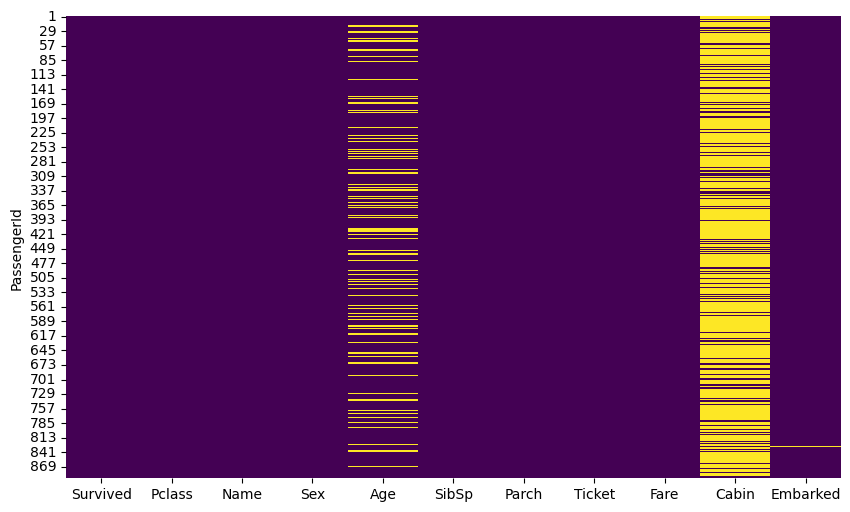

In [89]:
# Take a look at nans
nan_df = titanic.isna()
plt.figure(figsize=(10, 6))
sns.heatmap(nan_df, cbar=False, cmap='viridis')
plt.show()
#titanic['Age'].value_counts()
#titanic.loc[titanic['Age'].isna()]

### Step 5. Create a pie chart presenting the male/female proportion

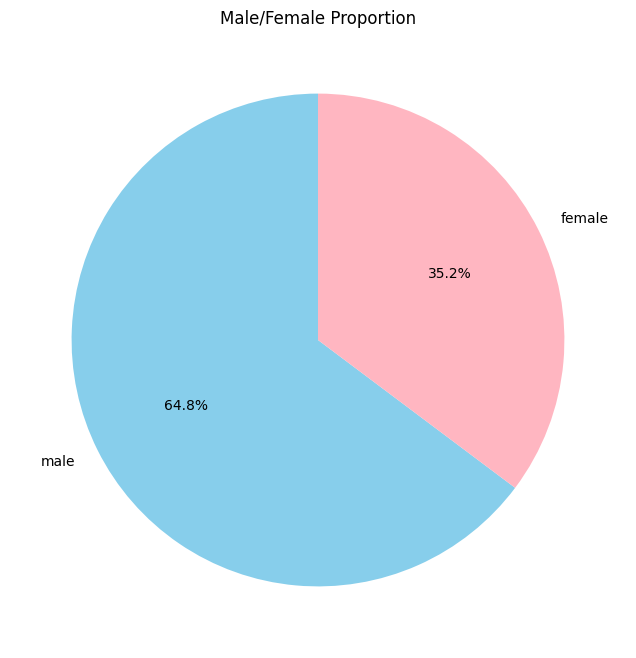

In [90]:
sex_counts = titanic['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'])
plt.title('Male/Female Proportion')
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

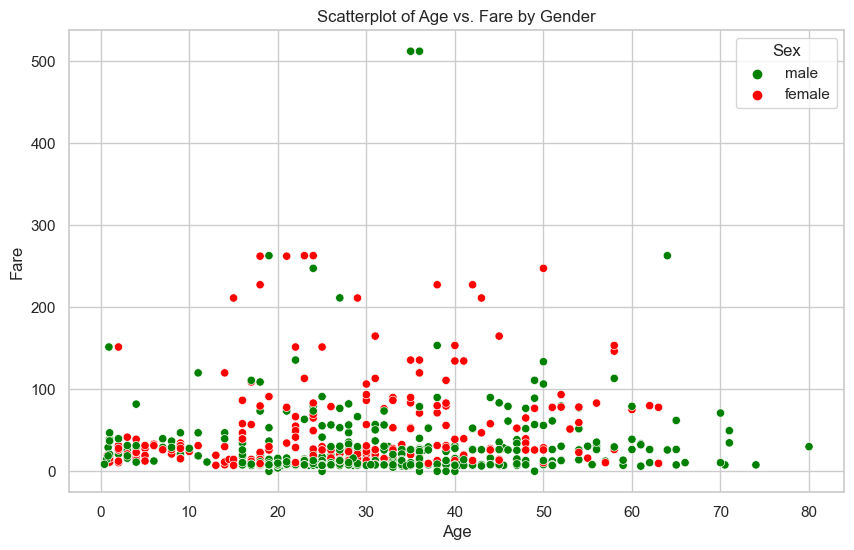

In [91]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Sex', data=titanic, palette=['green', 'red'])
plt.title('Scatterplot of Age vs. Fare by Gender')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### Step 7. How many people survived?

Survived 342



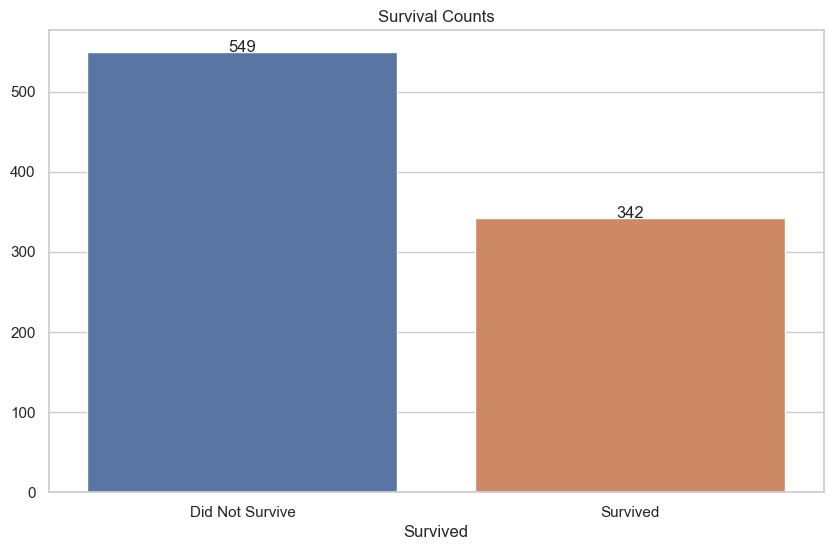

In [152]:
survival_counts = titanic['Survived'].value_counts()
print (f"Survived {survival_counts[1]}\n")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title('Survival Counts')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])
for index, value in enumerate(survival_counts.values):
    plt.text(x=index, y=value, s=str(value), ha='center')
plt.show()

### Step 8. Create a histogram with the Fare payed

In [93]:
# pd.set_option('display.max_rows', None)
# print(len(titanic['Fare'].value_counts()))
# titanic['Fare'].value_counts()

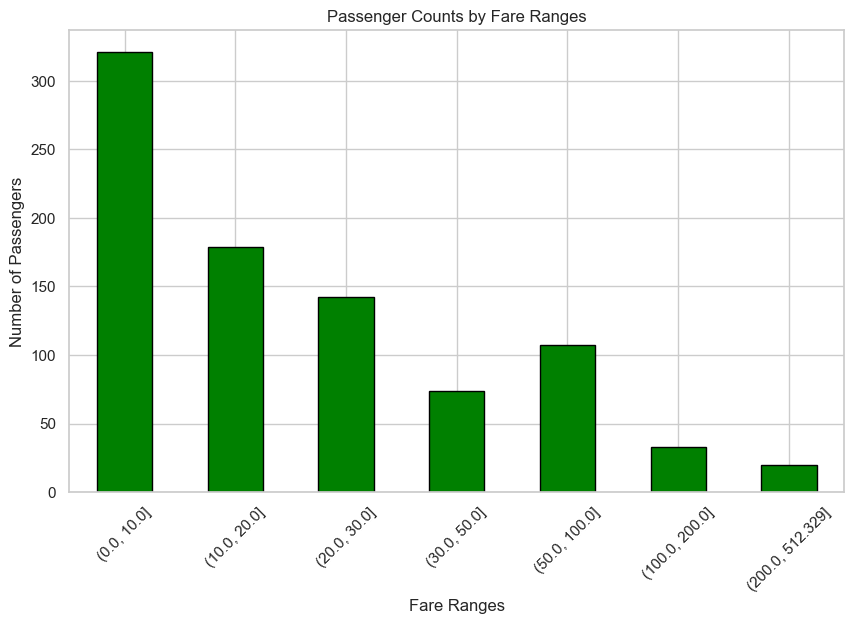

In [94]:
# plt.figure(figsize=(10, 6))
# sns.histplot(titanic['Fare'], bins=248, kde=False)
# plt.title('Distribution of Fares Paid')
# plt.xlabel('Fare')
# plt.ylabel('Number of Passengers')
# plt.show()
# Define fare ranges
plt.figure(figsize=(10, 6))
fare_ranges = [0, 10, 20, 30, 50, 100, 200, max(titanic['Fare'])]
# Categorize fares into ranges
fare_categories = pd.cut(titanic['Fare'], bins=fare_ranges)
# Count passengers in each range
fare_counts = fare_categories.value_counts().sort_index()
# Plot the distribution
fare_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Passenger Counts by Fare Ranges')
plt.xlabel('Fare Ranges')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### BONUS: Create your own question and answer it.

#### What is the dying rate by fare, passenger class (Pclass), gender, and age?

Pclass  Sex     AgeGroup  FareGroup      
1       female  (0, 18]   (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]    0.090909
                (18, 30]  (-0.001, 7.91]          NaN
                                               ...   
3       male    (50, 60]  (31.0, 512.329]         NaN
                (60, 80]  (-0.001, 7.91]     1.000000
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]         NaN
Name: Survived, Length: 144, dtype: float64


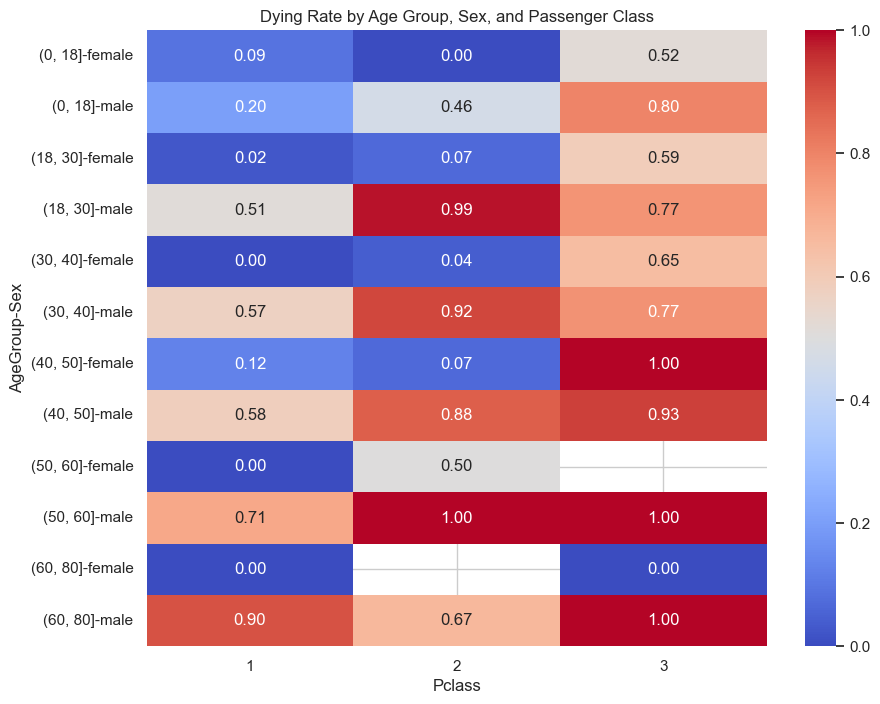

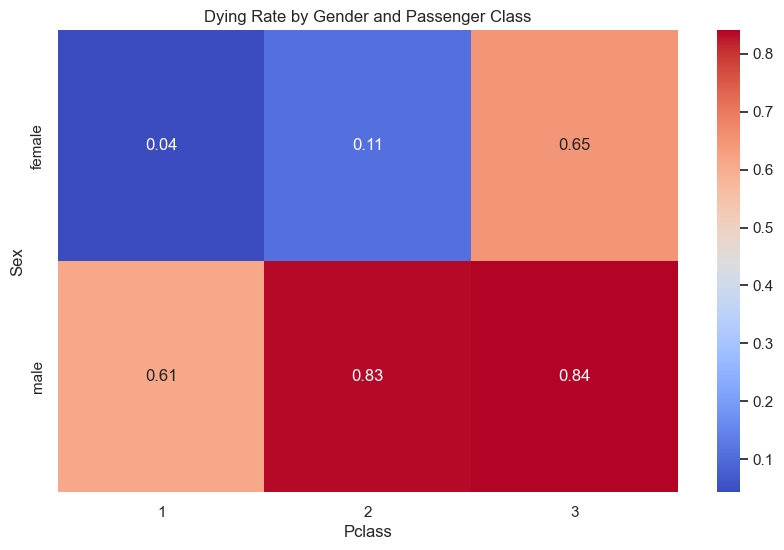

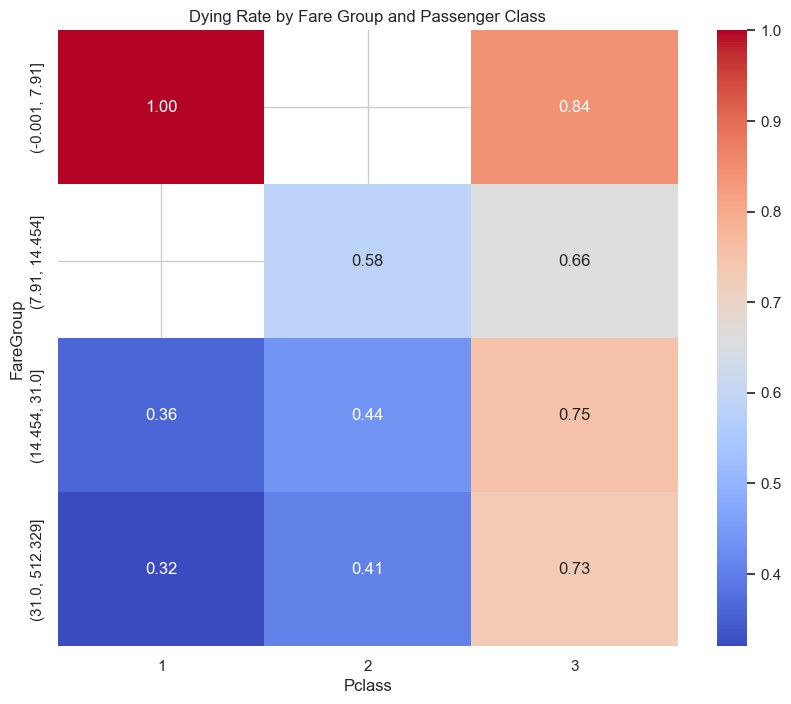

In [158]:
# Categorize 'Age' into bins
age_bins = [0, 18, 30, 40, 50, 60, 80]
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_bins)

# Categorize 'Fare' into quantile-based bins
fare_bins = pd.qcut(titanic['Fare'], 4)  # Quartiles
titanic['FareGroup'] = fare_bins

# Group by 'Pclass', 'Sex', 'AgeGroup', 'FareGroup' and calculate mean survival rate
grouped = titanic.groupby(['Pclass', 'Sex', 'AgeGroup', 'FareGroup'], observed=False)
dying_rate = 1 - grouped['Survived'].mean()

print(dying_rate)

# Reset the index of the dying rate Series to convert it to a DataFrame
dying_rate_df = dying_rate.reset_index(name='DyingRate')

# Create a heatmap for one of the categories - 'Pclass'
plt.figure(figsize=(10, 8))
heatmap_data = dying_rate_df.pivot_table(index=['AgeGroup', 'Sex'], columns='Pclass', values='DyingRate', observed=False)
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Dying Rate by Age Group, Sex, and Passenger Class')
plt.show()

# Create a heatmap for Gender and Passenger Class
plt.figure(figsize=(10, 6))
heatmap_gender_pclass = dying_rate_df.pivot_table(index='Sex', columns='Pclass', values='DyingRate')
sns.heatmap(heatmap_gender_pclass, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Dying Rate by Gender and Passenger Class')
plt.show()

# Create a heatmap for Fare Group and Passenger Class
plt.figure(figsize=(10, 8))
heatmap_fare_pclass = dying_rate_df.pivot_table(index='FareGroup', columns='Pclass', values='DyingRate', observed=False)
sns.heatmap(heatmap_fare_pclass, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Dying Rate by Fare Group and Passenger Class')
plt.show()

## Section 8: Creating Series and DataFrames

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [229]:
import pandas as pd

### Step 2. Create a data dictionary that looks like the DataFrame below

In [230]:
data_dict = {
    "evolution": ["Ivysaur", "Charmeleon", "Wartortle", "Metapod"],
    "hp": [45, 39, 44, 45],
    "name": ["Bulbasaur", "Charmander", "Squirtle", "Caterpie"],
    "pokedex": ["yes", "no", "yes", "no"],
    "type": ["grass", "fire", "water", "bug"]
}

### Step 3. Assign it to a variable called pokemon

In [231]:
pokemon = pd.DataFrame(data_dict)
pokemon

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,yes,grass
1,Charmeleon,39,Charmander,no,fire
2,Wartortle,44,Squirtle,yes,water
3,Metapod,45,Caterpie,no,bug


### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [232]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution', 'pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### Step 5. Add another column called place, and insert what you have in mind.

In [233]:
pd.options.mode.chained_assignment = None # Get rid of positive warnings
pokemon['place'] = ['Tower', 'Fountain', 'Church', 'Park']
#pokemon.loc[:, 'place'] = ['Tower', 'Fountain', 'Church', 'Park']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,Tower
1,Charmander,fire,39,Charmeleon,no,Fountain
2,Squirtle,water,44,Wartortle,yes,Church
3,Caterpie,bug,45,Metapod,no,Park


### Step 6. Present the type of each column

In [234]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

### BONUS: Create your own question and answer it.

#### Add a new column and specify its data type

In [235]:
habitats = ['Forest', 'Ocean', 'Mountain', 'Grassland']
pokemon.loc[:, 'habitat'] = pd.Series(habitats, dtype='category')
print(pokemon['habitat'].dtype)
# pokemon.loc[2, 'habitat'] = 'River' # Category error
pokemon.loc[2, 'habitat'] = 'Grassland'
pokemon

category


,name,type,hp,evolution,pokedex,place,habitat
0,Bulbasaur,grass,45,Ivysaur,yes,Tower,Forest
1,Charmander,fire,39,Charmeleon,no,Fountain,Ocean
2,Squirtle,water,44,Wartortle,yes,Church,Grassland
3,Caterpie,bug,45,Metapod,no,Park,Grassland


## Section: 9 Time Series

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [236]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [237]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [238]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [239]:
apple['Date'] = pd.to_datetime(apple['Date'])
print(apple['Date'].dtype)

datetime64[ns]


### Step 6.  Set the date as the index

In [240]:
apple.set_index('Date', inplace=True)
apple.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.8,93.92,95.35,65130000,95.35


### Step 7.  Is there any duplicate dates?

In [241]:
date_duplicates = apple.index.duplicated().any()
print(date_duplicates)
duplicates = apple.duplicated().any()
duplicates

False


False

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [242]:
apple.sort_index(inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [243]:
last_business_day_of_each_month = apple.resample('BME').last()
last_business_day_of_each_month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


### Step 10.  What is the difference in days between the first day and the oldest

In [244]:
apple.index[-1] - apple.index[0]

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [245]:
apple.index.to_period('M').nunique()

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

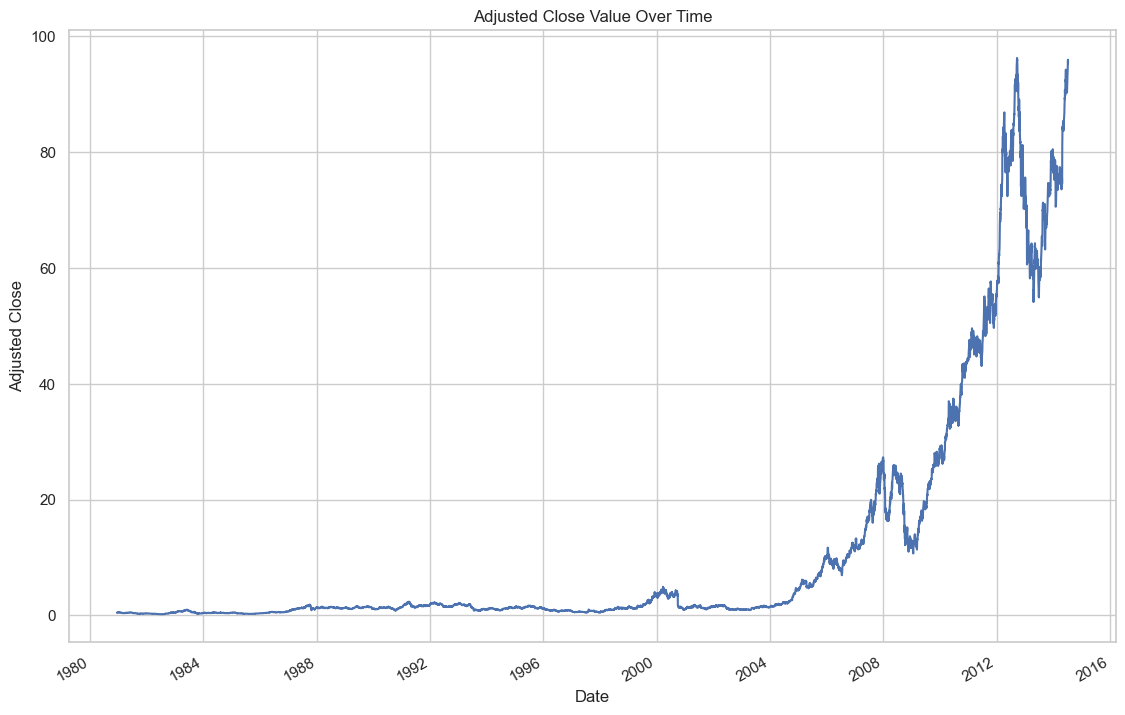

In [246]:
plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot(title='Adjusted Close Value Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.show()

## Section 10: Deleting

### Introduction:

This exercise is a adaptation from the UCI Wine dataset.
The only pupose is to practice deleting data with pandas.

### Step 1. Import the necessary libraries

In [247]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). 

### Step 3. Assign it to a variable called wine

In [248]:
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
           'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None, names=columns)
wine.head(4)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


### Step 4. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [249]:
columns_to_drop = wine.columns[[0, 3, 6, 8, 10, 12, 13]]
wine.drop(columns=columns_to_drop, inplace=True)
wine.head(1)

,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Flavanoids,Proanthocyanins,Hue
0,14.23,1.71,15.6,127,3.06,2.29,1.04


### Step 5. Assign the columns as below:

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [250]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head(1)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.23,1.71,15.6,127,3.06,2.29,1.04


### Step 6. Set the values of the first 3 rows from alcohol as NaN

In [251]:
wine.loc[0:2, 'alcohol'] = np.nan
wine.head(4)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127,3.06,2.29,1.04
1,NaN,1.78,11.2,100,2.76,1.28,1.05
2,NaN,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86


### Step 7. Now set the value of the rows 3 and 4 of magnesium as NaN

In [252]:
# wine.loc[3:4, 'magnesium'] = np.nan
wine.iloc[3:5, wine.columns.get_loc('magnesium')] = np.nan
wine.head(6)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,NaN,2.36,18.6,101.0,3.24,2.81,1.03
3,14.37,1.95,16.8,NaN,3.49,2.18,0.86
4,13.24,2.59,21.0,NaN,2.69,1.82,1.04
5,14.20,1.76,15.2,112.0,3.39,1.97,1.05


### Step 8. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [253]:
wine['alcohol'] = wine['alcohol'].fillna(10)
wine['magnesium'] = wine['magnesium'].fillna(100)
wine.head(6)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,101.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
4,13.24,2.59,21.0,100.0,2.69,1.82,1.04
5,14.20,1.76,15.2,112.0,3.39,1.97,1.05


### Step 9. Count the number of missing values

In [254]:
print(wine.isna().sum())
wine.isna().sum().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64


0

### Step 10.  Create an array of 10 random numbers up until 10

In [255]:
random_numbers = np.random.randint(0, 10, size=10)
random_numbers

array([5, 4, 3, 8, 8, 3, 3, 6, 7, 2])

### Step 11.  Use random numbers you generated as an index and assign NaN value to each of cell.

In [256]:
wine.loc[random_numbers, ['alcohol', 'alcalinity_of_ash', 'flavanoids', 'hue']] = np.nan
wine.head(11)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,NaN,2.36,NaN,101.0,NaN,2.81,NaN
3,NaN,1.95,NaN,100.0,NaN,2.18,NaN
4,NaN,2.59,NaN,100.0,NaN,1.82,NaN
5,NaN,1.76,NaN,112.0,NaN,1.97,NaN
6,NaN,1.87,NaN,96.0,NaN,1.98,NaN
7,NaN,2.15,NaN,121.0,NaN,1.25,NaN
8,NaN,1.64,NaN,97.0,NaN,1.98,NaN
9,13.86,1.35,16.0,98.0,3.15,1.85,1.01


### Step 12.  How many missing values do we have?

In [257]:
wine.isna().sum().sum()

28

### Step 13. Delete the rows that contain missing values

In [258]:
wine.dropna(inplace=True)
wine.head(11)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
9,13.86,1.35,16.0,98.0,3.15,1.85,1.01
10,14.10,2.16,18.0,105.0,3.32,2.38,1.25
11,14.12,1.48,16.8,95.0,2.43,1.57,1.17
12,13.75,1.73,16.0,89.0,2.76,1.81,1.15
13,14.75,1.73,11.4,91.0,3.69,2.81,1.25
14,14.38,1.87,12.0,102.0,3.64,2.96,1.20
15,13.63,1.81,17.2,112.0,2.91,1.46,1.28
16,14.30,1.92,20.0,120.0,3.14,1.97,1.07


### Step 14. Print only the non-null values in alcohol

In [259]:
# print(wine['alcohol'][wine['alcohol'].notna()])
# print(wine['alcohol'][~wine['alcohol'].isna()])
# print(wine['alcohol'].dropna())
print(wine['alcohol'].to_string())

0      10.00
1      10.00
9      13.86
10     14.10
11     14.12
12     13.75
13     14.75
14     14.38
15     13.63
16     14.30
17     13.83
18     14.19
19     13.64
20     14.06
21     12.93
22     13.71
23     12.85
24     13.50
25     13.05
26     13.39
27     13.30
28     13.87
29     14.02
30     13.73
31     13.58
32     13.68
33     13.76
34     13.51
35     13.48
36     13.28
37     13.05
38     13.07
39     14.22
40     13.56
41     13.41
42     13.88
43     13.24
44     13.05
45     14.21
46     14.38
47     13.90
48     14.10
49     13.94
50     13.05
51     13.83
52     13.82
53     13.77
54     13.74
55     13.56
56     14.22
57     13.29
58     13.72
59     12.37
60     12.33
61     12.64
62     13.67
63     12.37
64     12.17
65     12.37
66     13.11
67     12.37
68     13.34
69     12.21
70     12.29
71     13.86
72     13.49
73     12.99
74     11.96
75     11.66
76     13.03
77     11.84
78     12.33
79     12.70
80     12.00
81     12.72
82     12.08
83     13.05

### Step 15.  Reset the index, so it starts with 0 again

In [260]:
wine.reset_index(drop=True, inplace=True)
wine.head(11)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,13.86,1.35,16.0,98.0,3.15,1.85,1.01
3,14.10,2.16,18.0,105.0,3.32,2.38,1.25
4,14.12,1.48,16.8,95.0,2.43,1.57,1.17
5,13.75,1.73,16.0,89.0,2.76,1.81,1.15
6,14.75,1.73,11.4,91.0,3.69,2.81,1.25
7,14.38,1.87,12.0,102.0,3.64,2.96,1.20
8,13.63,1.81,17.2,112.0,2.91,1.46,1.28
9,14.30,1.92,20.0,120.0,3.14,1.97,1.07
